In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
# load cleaned data
df = pd.read_csv('../data/processed/cleanedOnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
# snapshot date for recency calculation
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days = 1)

In [10]:
# RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

In [12]:
rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'}, inplace=True)

In [13]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [20]:
#scale data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
# rfm_scaled

In [17]:
# k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [18]:
rfm_scaled

array([[ 2.32202285, -0.32936215, -0.23041952],
       [-0.89373323,  0.20610242,  0.29405454],
       [-0.1691956 , -0.11517632, -0.01171748],
       ...,
       [-0.83418219, -0.22226923, -0.20892947],
       [-0.87388289,  1.16993863,  0.01849636],
       [-0.48680114, -0.22226923, -0.00684511]], shape=(4372, 3))

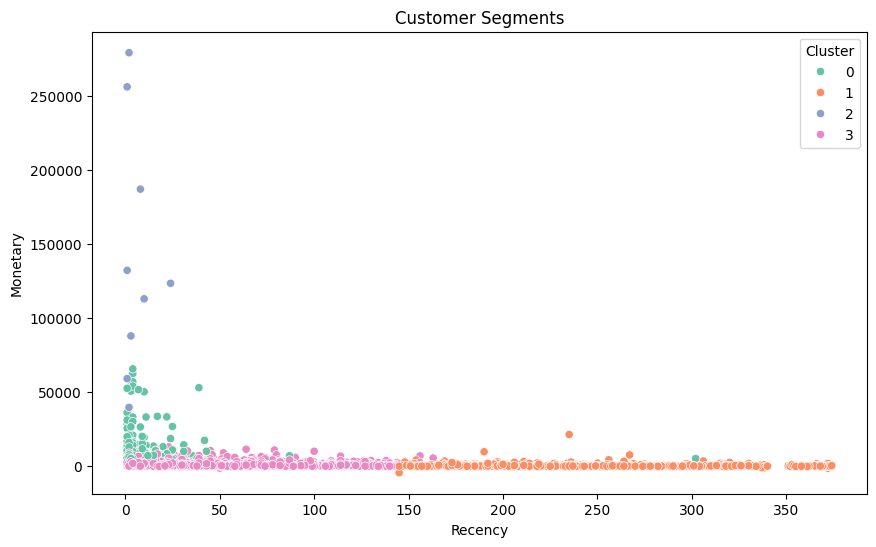

In [21]:
# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set2')
plt.title('Customer Segments')
plt.savefig('../images/customer_segments.png')
plt.show()

In [22]:
# Cluster analysis
print(rfm.groupby('Cluster').mean())

            Recency   Frequency       Monetary
Cluster                                       
0         10.787565   28.575130   12190.961710
1        248.927577    1.805942     453.425572
2          5.090909  109.909091  124150.432727
3         42.768360    4.374313    1317.266164


Insights: High value customers are Cluster 2 (low Recency, high Monetary, high Frequency) → prioritize loyalty programs.